In [1]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [2]:
train = pd.read_csv("./data/train.csv")

survival=train['Survived']

encoded=pd.get_dummies(train['Sex'], prefix='sex')
train = pd.concat([train,encoded], axis=1)
train.drop('Sex', axis=1, inplace=True)

encoded=pd.get_dummies(train['Embarked'], prefix='embarked')
train = pd.concat([train,encoded], axis=1)
train.drop('Embarked', axis=1, inplace=True)

train.drop('Name', axis=1, inplace=True)
train.drop('Ticket', axis=1, inplace=True)
train.drop('Cabin', axis=1, inplace=True)
train.drop('Survived', axis=1, inplace=True)
train.drop('PassengerId', axis=1, inplace=True)

train

,Pclass,Age,SibSp,Parch,Fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,False,True,False,False,True
887,1,19.0,0,0,30.0000,True,False,False,False,True
888,3,NaN,1,2,23.4500,True,False,False,False,True
889,1,26.0,0,0,30.0000,False,True,True,False,False


In [46]:
survival

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [34]:
train['Age'].isna().sum()
train['Age'].unique()

np.int64(177)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

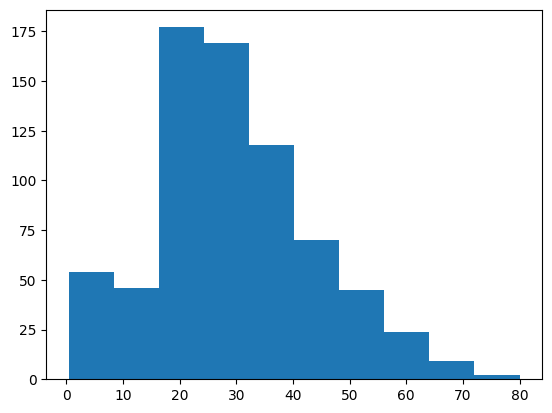

In [3]:
plt.hist(train['Age'])

In [3]:
from sklearn.impute import KNNImputer
knn = KNNImputer()
new=knn.fit_transform(train)
new

array([[ 3. , 22. ,  1. , ...,  0. ,  0. ,  1. ],
       [ 1. , 38. ,  1. , ...,  1. ,  0. ,  0. ],
       [ 3. , 26. ,  0. , ...,  0. ,  0. ,  1. ],
       ...,
       [ 3. , 20.4,  1. , ...,  0. ,  0. ,  1. ],
       [ 1. , 26. ,  0. , ...,  1. ,  0. ,  0. ],
       [ 3. , 32. ,  0. , ...,  0. ,  1. ,  0. ]], shape=(891, 10))

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(new)
train_scaled = scaler.transform(new)
train_scaled

array([[ 0.82737724, -0.59625721,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [-1.56610693,  0.58015938,  0.43279337, ...,  2.0745051 ,
        -0.30756234, -1.61470971],
       [ 0.82737724, -0.30215306, -0.4745452 , ..., -0.48204268,
        -0.30756234,  0.61930636],
       ...,
       [ 0.82737724, -0.71389886,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [-1.56610693, -0.30215306, -0.4745452 , ...,  2.0745051 ,
        -0.30756234, -1.61470971],
       [ 0.82737724,  0.13900316, -0.4745452 , ..., -0.48204268,
         3.25137334, -1.61470971]], shape=(891, 10))

In [21]:
np.count_nonzero(np.isnan(new))

0

In [6]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log_loss', alpha=0.01,
                    max_iter=1000, random_state=25)
sgd.fit(train_scaled,survival)

SGDClassifier(alpha=0.01, loss='log_loss', random_state=25)

In [11]:
test=pd.read_csv('./data/test.csv')

PassengerId=test['PassengerId']

encoded=pd.get_dummies(test['Sex'], prefix='sex')
test=pd.concat([test,encoded], axis=1)
test.drop('Sex',axis=1,inplace=True)


encoded=pd.get_dummies(test['Embarked'], prefix='embarked')
test=pd.concat([test,encoded], axis=1)
test.drop('Embarked',axis=1,inplace=True)


test.drop('Name',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)
test.drop('PassengerId',axis=1,inplace=True)

test=knn.fit_transform(test)

test_scaled=scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled)

In [12]:
solution=sgd.predict(test_scaled)
solution_df = pd.DataFrame(solution, columns=['Survived'])
solution_df= pd.concat([PassengerId,solution_df], axis=1)
solution_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [100]:
solution_df.to_csv('attempt4.csv',index=False)

In [45]:
final_df.isna().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
sex_female     0
sex_male       0
embarked_C     0
embarked_Q     0
embarked_S     0
dtype: int64

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=250,random_state=17)
rf.fit(train_scaled, survival)

RandomForestClassifier(n_estimators=250, random_state=17)

In [102]:

rfSolution=rf.predict(test_scaled)
rfDF=pd.DataFrame(rfSolution,columns=['Survived'])
rf_solution=pd.concat([PassengerId,rfDF], axis=1)
rf_solution

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1


In [103]:
rf_solution['Survived'].unique()

array([0, 1])

In [104]:
rf_solution.to_csv('rf1Titanic2.csv',index=False)

In [114]:
key=pd.read_csv('./data/survived.csv')
key=key['Survived']
key


0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [112]:
rfSolution

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [120]:
def compareLists(list1,list2):
    count=0
    if len(list1) != len(list2):
        return False
    else:
        for i in range(len(list1)):
            if list1[i] == list2[i]:
                count+=1
    return count/len(list1)


print(compareLists(key.tolist(),rfSolution.tolist()))

0.7966507177033493
